# 나랑 닮은 연예인을 찾아보자!

## Step 1. 사진 모으기

내 사진을 넣어봅시다! 사진은 `./data` 파일에 넣어주도록 합시다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import face_recognition
import os

### 내 사진을 준비합시다.

In [12]:
image_path = os.path.dirname(os.path.abspath('__file__')) + r'/data/'
img1_path = os.path.join(image_path, 'img.JPG')
img2_path = os.path.join(image_path, 'img2.JPG')

image1 = face_recognition.load_image_file(img1_path)
image2 = face_recognition.load_image_file(img2_path)

img1_face_locations = face_recognition.face_locations(image1)
img2_face_locations = face_recognition.face_locations(image2)

print("Image 1의 얼굴 영역 좌표 : ", img1_face_locations)
print("Image 2의 얼굴 영역 좌표 : ", img2_face_locations)

Image 1의 얼굴 영역 좌표 :  [(511, 1682, 1469, 723)]
Image 2의 얼굴 영역 좌표 :  [(514, 1046, 1313, 248)]


In [6]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    return cropped_face

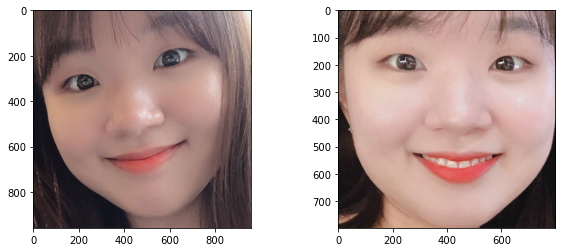

In [59]:
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
ax1 = plt.imshow(cropped_face1)
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.imshow(cropped_face2)

plt.show()

크크크 잘나오는군요!! 제 얼굴의 임베딩도 구해봅시다!

## 내 얼굴의 임베딩 벡터 거리를 구해봅시다.

In [17]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [19]:
embedding1 = get_face_embedding(cropped_face1)
embedding2 = get_face_embedding(cropped_face2)

In [28]:
distances = np.linalg.norm(embedding1[0] - embedding2[0])
print(distances)

0.29396961226503904


제 두 사진 얼굴사이의 거리는 꽤 낮네요!! ㅎㅎ 다행히도 동일 인물이라고 잘 판단하고 있는 것 같습니다.

그럼 이제 다른 데이터들을 구해보러 갑시다. 저와 가장 비슷한 연예인은 누구일까요?


## Step 2. 얼굴 영역 자르기 & Step 3. 얼굴 영역의 임베딩 추출하기

### 연예인 데이터 불러와서 임베딩 벡터 `embedding_dict`에 저장하기




연예인 데이터는.. 여러분들이 한땀한땀 모으셔야 합니다 ^^ 다행히 제가 `./data/celebrity` 폴더에 모아놓았습니다. 아래 링크에서 확인하실 수 있습니다. :)

- [Github - Jiyeon's celebrity image dataset](https://github.com/jiyeoon/aiffel/tree/master/Week7/data/celebrity)
- [바로 다운로드 - Google Drive Link](https://drive.google.com/file/d/1Ty9pURsCdqEmnN1ebcy554iWVKU8XqVD/view?usp=sharing)

그럼 자주 사용하는 함수를 만들고 연예인 데이터를 불러와봅시다!

In [32]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        image_path = os.path.join(dir_path, file)
        try:
            face = get_cropped_face(image_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        except:
            pass
    return embedding_dict

In [33]:
dir_path = os.path.dirname(os.path.abspath('__file__')) + r'/data/celebrity'
embedding_dict = get_face_embedding_dict(dir_path)
print("슝=3")

슝=3


In [34]:
embedding_dict['아이린']

array([-0.10181993,  0.07929453,  0.00718652, -0.11879449, -0.08134992,
       -0.04299925, -0.05773568, -0.11321756,  0.15138903, -0.20885536,
        0.18029809, -0.13891748, -0.22281893, -0.00120886, -0.0830161 ,
        0.24276291, -0.13112399, -0.12633233, -0.07051142,  0.01983993,
        0.11000504,  0.06254245, -0.06499258,  0.10676219, -0.01683923,
       -0.28969833, -0.14053418, -0.01125034, -0.01945219, -0.07790258,
       -0.08217339,  0.03632967, -0.15188614, -0.04739356,  0.02344309,
        0.15661392, -0.01905784, -0.11563408,  0.12024595,  0.02981463,
       -0.2856054 ,  0.10640097,  0.11470314,  0.26011196,  0.15611403,
       -0.00350354, -0.01439178, -0.19605443,  0.11402895, -0.17554669,
        0.02433313,  0.09433556,  0.08332569,  0.07521395,  0.04545403,
       -0.11212274,  0.06941453,  0.09918618, -0.15369159,  0.00786762,
        0.15859936, -0.08083047, -0.03088863, -0.12292906,  0.17480746,
        0.10221735, -0.10163692, -0.25470114,  0.14337   , -0.20

오! 답이 잘 나오네요! 그럼 이제 본격적으로 나와 닮은 연예인을 찾으러 가봅시다!

## Step 4. 모은 연예인들과 비교하기

그럼 내 얼굴 임베딩의 값과 연예인들 중 가장 닮은 연예인을 발견해봅시다!! 꼬고!!

In [35]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1] - embedding_dict[name2], ord=2)

In [37]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [45]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0:
            continue
        if sorted_faces[i]:
            print("순위 {} / 이름 : {} / 거리 : {}".format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [43]:
embedding_dict['이지연'] = embedding2[0]

In [46]:
get_nearest_face('이지연')

순위 1 / 이름 : 케이 / 거리 : 0.388015174299863
순위 2 / 이름 : 강민경 / 거리 : 0.434685277984588
순위 3 / 이름 : 우기 / 거리 : 0.43836987250540355
순위 4 / 이름 : 온앤오프라운 / 거리 : 0.4451738037979254
순위 5 / 이름 : 장원영 / 거리 : 0.4458503798262231


오!!!!!! 1등은 케이입니다!! 와~ 제가 케이라니 ?! (사실 케이 잘 모릅니다.)

저와 닮은꼴인데 출력 안해보고 넘어갈 수 없겠죠? ㅎㅎ 한번 누구신지 확인해볼까요~

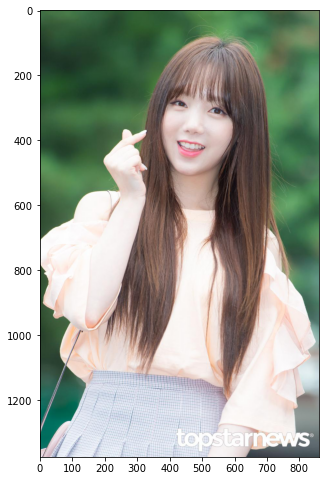

In [52]:
import matplotlib.image as img

plt.figure(figsize=(5, 10))
file_path = dir_path + r'/케이.jpg'
ndarray = img.imread(file_path)
plt.imshow(ndarray)

크크 아리따운 여성분입니다!!

그럼 재미있는 실습을 마치겠습니다. ^ㅅ^

In [53]:
from IPython.core.display import display, HTML
display(HTML("<style> .container{width:90% !important;}</style>"))